Consider https://stackoverflow.com/questions/44550764/how-can-i-embed-an-image-on-each-of-my-subplots-in-matplotlib


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def pcoord(x, y):
    """
    Convert x, y to polar coordinates r, az (geographic convention)
    r,az = pcoord(x, y)
    """
    r = np.sqrt(x**2 + y**2)
    az = np.degrees(np.arctan2(x, y))
    # az[where(az<0.)[0]] += 360.
    az = (az+360.)%360.
    return r, az

def xycoord(r, az):
    """
    Convert r, az [degrees, geographic convention] to rectangular coordinates
    x,y = xycoord(r, az)
    """
    x = r * np.sin(np.radians(az))
    y = r * np.cos(np.radians(az))
    return x, y

def circle(ax, x0, y0, r, pstring='--', col='gray', alpha=.6, npts=100, zorder=0):
    """
    Draw a circle centered at x0, y0 with radius r and npts
    """
    az = np.linspace(0., 360.)
    x, y = xycoord(r, az)
    xp, yp = x+x0, y+y0
    ax.plot(xp, yp, pstring, c=col, alpha=alpha, zorder=zorder)
    
def arc(ax, x0, y0, r, az0, az1, pstring='-', col='black', npts=20, alpha=.6, zorder=0):
    """
    Draw an arc with radius r from az0 to az1 with npts
    """
    az = np.linspace( az0, az1, npts )
    x, y = xycoord( r, az )
    xp, yp = x+x0, y+y0
    ax.plot(xp, yp, pstring, c=col, alpha=alpha, zorder=zorder)
    
def pline(ax, x0, y0, x, y, pstring='-', col='black', alpha=.6, zorder=1):
    """
    Draw a line using arrays x, y
    """
    ax.plot( x0+x, x0+y, pstring, c=col, alpha=alpha, zorder=zorder)
    
def ptext(ax, x0, y0, r, az, txt, alpha=.6, zorder=0, fontsize=8):
    """
    Draw text using polar coordinates
    """
    x, y = xycoord( r, az )
    ax.text(x+x0, y+y0, txt, alpha=alpha, fontsize=fontsize )
    
def plt_data(ax, lon, lat, Hs, Tp, sigf, Dp, Dsprd):
    sf = 10 # scale factor for sigmaf
    ps = 50 # point size for Hs
    # coordinates for plot, based on peak period and peak direction
    wx, wy = xycoord(Tp, Dp)

    # coordinates for frequency spread, scaled by sf
    rlo, rhi = Tp-sigf*sf, Tp+sigf*sf
    rlox, rloy = xycoord(rlo, Dp)
    rhix, rhiy = xycoord(rhi, Dp)
    rx = np.array((rlox, rhix))
    ry = np.array((rloy, rhiy))
    arc(ax, x0, y0, Tp, Dp-Dsprd/2., Dp+Dsprd/2., zorder=1)
    pline(ax, x0, y0, rx, ry, zorder=1 )
    ax.scatter(wx, wy, ps, Hs, vmin=0., vmax=10., zorder=3)   

In [3]:
# some dummy data
lon = -67
lat = 44.

Hs = 6.
Tp = 12.
sigf = .2
Dp = 47.
Dsprd = 37.
sf = 10 # scale factor for sigmaf
ps = 50 # point size for Hs

# coordinates for plot, based on peak period and peak direction
wx, wy = xycoord(Tp, Dp)

# coordinates for frequency spread, scaled by sf
rlo, rhi = Tp-sigf*sf, Tp+sigf*sf
rlox, rloy = xycoord(rlo, Dp)
rhix, rhiy = xycoord(rhi, Dp)
rx = np.array((rlox, rhix))
ry = np.array((rloy, rhiy))

x0 = 0.
y0 = 0.

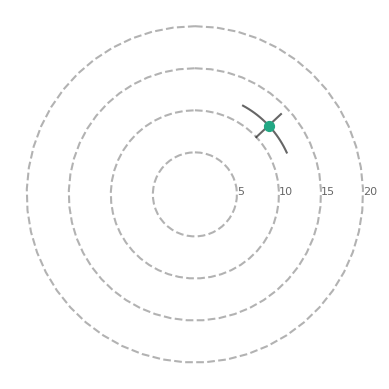

In [5]:
fig = plt.figure( )
ax = fig.add_subplot()
ax.set_aspect('equal', adjustable='box')

# period rings
circle(ax, x0, y0, 5, zorder=0)
circle(ax, x0, y0, 10, zorder=0)
circle(ax, x0, y0, 15, zorder=0)
circle(ax, x0, y0, 20, zorder=0)
# label rings
for i in np.array((5, 10, 15, 20)):
    ptext(ax, x0, y0, i, 90, "{}".format(i) )
ax.axis('off')

plt_data(ax, lon, lat, Hs, Tp, sigf, Dp, Dsprd)



In [10]:
# read some wave data
colnames = ['epoch','lon','lat','Hs','sigf','Tp','Dp','Dsprd']
ds = pd.read_csv('wave_stats.csv',names=colnames, header=None)
ds.describe()

,epoch,lon,lat,Hs,sigf,Tp,Dp,Dsprd
count,8.700000e+01,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000
mean,1.694853e+09,-69.779938,42.728937,2.630000,0.122113,11.716195,139.204954,34.640184
std,9.162921e+04,1.336965,0.923397,1.892909,0.041838,4.055057,77.700618,10.574398
min,1.694696e+09,-76.425370,38.282680,0.199000,0.032961,6.023000,5.326000,21.236000
25%,1.694776e+09,-69.698250,42.555915,1.678500,0.091826,8.533000,106.381000,29.047000
50%,1.694854e+09,-69.482600,42.839430,2.125000,0.117631,11.378000,144.978000,32.581000
75%,1.694931e+09,-69.349245,43.207065,3.154500,0.153004,14.628000,157.533000,36.879500
max,1.695009e+09,-69.253930,43.408370,14.425000,0.215510,25.602000,314.050000,76.191000


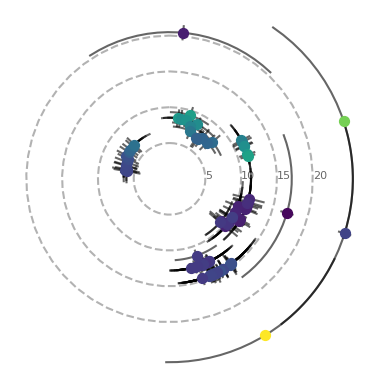

In [11]:
fig = plt.figure( )
ax = fig.add_subplot()
ax.set_aspect('equal', adjustable='box')

# period rings
circle(ax, x0, y0, 5, zorder=0)
circle(ax, x0, y0, 10, zorder=0)
circle(ax, x0, y0, 15, zorder=0)
circle(ax, x0, y0, 20, zorder=0)
# label rings
for i in np.array((5, 10, 15, 20)):
    ptext(ax, x0, y0, i, 90, "{}".format(i) )
ax.axis('off')

for i in range(ds.shape[0]):
    plt_data(ax, ds['lon'][i], ds['lat'][i], ds['Hs'][i], ds['Tp'][i], ds['sigf'][i], ds['Dp'][i], ds['Dsprd'][i])
    